In [1]:
import os
import json
import pandas
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.externals import joblib
% matplotlib inline

In [2]:
Ned = []
Med = []
NRd = []
MRd = []
fck = []
As = []
bh = []
a = []
xu = []
l0 = []
listdir = os.listdir("../../data_set/buckling")


for file in listdir:
    f = open("../../data_set/buckling/" + file)
    d = json.loads(f.read())
    f.close()

    for o in d:
        Ned.append(o["Ned"])
        Med.append(o["Med"])
        NRd.append(o["NRd"])
        MRd.append(o["MRd"])
        fck.append(o["fck"])
        As.append(o["As"])
        bh.append(o["bh"])
        a.append(o["a"])
        xu.append(o["xu"])
        l0.append(o["l0"])

rho = []
for i in range(len(As)):
    rho.append(As[i] / bh[i]**2)

In [3]:
df = pandas.DataFrame({
        "l0": l0,
        "Ned": Ned,
        "MRd": MRd,
        "fck": fck,
        "bh": bh,
        "rho": rho,
    }
    )
print(df.shape)
df = df[df["fck"] == 30]
print(df.shape)
df.head(5)

(9766650, 6)
(3327000, 6)


,MRd,Ned,bh,fck,l0,rho
1,38449546,100000,250,30,5400,0.004800
4,42784545,100000,275,30,5400,0.003967
7,52489056,100000,300,30,5400,0.003889
10,68940078,100000,325,30,5400,0.004260
13,93396413,100000,350,30,5400,0.004898


In [4]:
# Scale all features by their mean and std-dev to value 0 - 1. This is the correct one.

feat_df = df[["MRd", "rho", "Ned", "l0"]]
res_df = df[["bh"]]

scale_feat = preprocessing.MinMaxScaler()
scale_feat.fit(feat_df)
print(scale_feat.transform(feat_df))

scale_res = preprocessing.MinMaxScaler()
scale_res.fit(res_df)

[[ 0.          0.1088725   0.          0.34693878]
 [ 0.0043363   0.0877827   0.          0.34693878]
 [ 0.01404371  0.0858067   0.          0.34693878]
 ..., 
 [ 0.531571    0.03070257  0.31010453  0.79591837]
 [ 0.62073354  0.03911252  0.31010453  0.79591837]
 [ 0.71418745  0.04636459  0.31010453  0.79591837]]


MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
df = df.sample(frac=1)

df_train = df[:int(2e6)]
df_test = df[int(2e6):]
df_train.head(5)

print(df_train.shape, df_test.shape)

(2000000, 6) (1327000, 6)


In [6]:
train_feat = scale_feat.transform(df_train[["MRd", "rho", "Ned", "l0"]])
train_res = df_train[["bh"]].as_matrix()

print("Training features:\n MRd; rho, Ned, l0\n")
print(train_feat[:5])

print("\nTraining labels:\n bh\n")
print(train_res[:5])
print(train_feat.shape)

Training features:
 MRd; rho, Ned, l0

[[ 0.27008906  0.43167889  0.06968641  0.6122449 ]
 [ 0.24290567  0.02101644  0.37979094  0.04081633]
 [ 0.61649052  0.08293639  0.15679443  0.79591837]
 [ 0.31776161  0.76090329  0.17073171  0.53061224]
 [ 0.22088634  0.15837958  0.93728223  0.97959184]]

Training labels:
 bh

[[350]
 [475]
 [700]
 [300]
 [375]]
(2000000, 4)


In [7]:
X = train_feat
y = train_res
y = np.reshape(y, y.shape[0])

In [8]:
try:
    m = joblib.load("buckling_fck30")
except FileNotFoundError:
    m = MLPRegressor(max_iter=8000, learning_rate="adaptive", verbose=True, early_stopping=True)
    m.fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer

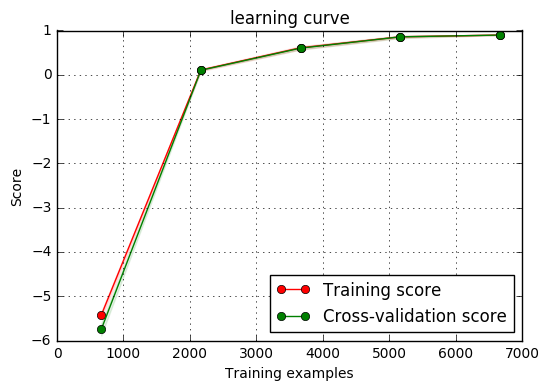

In [12]:
                                             
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(MLPRegressor(), "learning curve", X[:int(1e4)], y[:int(1e4)])
plt.show()

In [11]:
# Test
test_feat = scale_feat.transform(df_test[["MRd", "rho", "Ned", "l0"]])
test_res = df_test[["bh"]].as_matrix()

pred = m.predict(test_feat)

for i in range(15):
    print("Prediction :", int(pred[i]), "Computed: ", test_res[i][0], "Deviation: %s%%" % (round(1 - (pred[i] / test_res[i])[0], 2) * 100)) 

Prediction : 468 Computed:  450 Deviation: -4.0%
Prediction : 477 Computed:  475 Deviation: -0.0%
Prediction : 701 Computed:  700 Deviation: -0.0%
Prediction : 595 Computed:  600 Deviation: 1.0%
Prediction : 580 Computed:  575 Deviation: -1.0%
Prediction : 598 Computed:  600 Deviation: 0.0%
Prediction : 718 Computed:  725 Deviation: 1.0%
Prediction : 346 Computed:  350 Deviation: 1.0%
Prediction : 602 Computed:  600 Deviation: -0.0%
Prediction : 573 Computed:  575 Deviation: 0.0%


In [12]:
dev = 0
for i in range(pred.shape[0]):
    dev += abs(1 - (pred[i] / test_res[i])[0])

print("Total accuracy %s%%" % (100 - round(dev / pred.shape[0] * 100, 2)))


Total accuracy 98.64%


In [28]:
joblib.dump(m, 'buckling_fck30.pkl') 

['buckling_fck30.pkl']